In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")


# Generate a large dataset for the addition of two numbers
# Define the number of rows
num_rows = 10000

# Generate random integers between 1 and 1000 for the two numbers
np.random.seed(0)  # for reproducibility
number1 = np.random.randint(1, 1001, size=num_rows)
number2 = np.random.randint(1, 1001, size=num_rows)

# Calculate the sum of the two numbers
sum_values = number1 + number2

# Create a DataFrame
df = pd.DataFrame({
    'Number1': number1,
    'Number2': number2,
    'Sum': sum_values
})

# Save to CSV
file_path = '/mnt/data/addition_data.csv'
os.makedirs('/mnt/data', exist_ok=True)
df.to_csv(file_path, index=False)

file_path






'/mnt/data/addition_data.csv'

In [ ]:
data = pd.read_csv("/mnt/data/addition_data.csv")
data.head()

,Number1,Number2,Sum
0,685,678,1363
1,560,119,679
2,630,871,1501
3,193,267,460
4,836,746,1582


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Number1  10000 non-null  int64
 1   Number2  10000 non-null  int64
 2   Sum      10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
data.describe()

,Number1,Number2,Sum
count,10000.000000,10000.000000,10000.000000
mean,498.378600,498.541400,996.920000
std,287.764039,287.533887,407.510916
min,1.000000,1.000000,15.000000
25%,251.000000,250.000000,705.000000
50%,495.000000,497.000000,1001.000000
75%,750.000000,745.000000,1294.000000
max,1000.000000,1000.000000,2000.000000


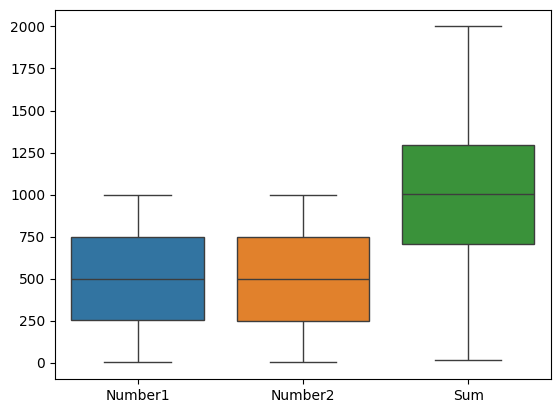

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(data)
plt.show()


# Store feature matrix in x and target in y


In [ ]:
X = data.drop(columns = ["Sum"])
#X = data["'Number1","Number2"]
y = data["Sum"]
X.head()

,Number1,Number2
0,685,678
1,560,119
2,630,871
3,193,267
4,836,746


In [ ]:
y.head()

,Sum
0,1363
1,679
2,1501
3,460
4,1582


# Train test and split

In [ ]:
from sklearn.model_selection  import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)
X_test.shape

(3000, 2)

# Training our model we will use linear regresion

In [ ]:
from sklearn.linear_model  import  LinearRegression
lr = LinearRegression()
model = lr.fit(X_train,y_train)
model

LinearRegression()

In [ ]:
model.score(X_train,y_train)

1.0

In [ ]:
model.score(X_test,y_test)

1.0

# Making prediction

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1004., 1446.,  473., ...,  577.,  377., 1101.])

In [ ]:
y_test

,Sum
6252,1004
4684,1446
1731,473
4742,1738
4521,866
...,...
8014,1010
1074,964
3063,577
6487,377


In [ ]:
df = pd.DataFrame({"Actual":y_test,"Prediction":y_pred})
df

,Actual,Prediction
6252,1004,1004.0
4684,1446,1446.0
1731,473,473.0
4742,1738,1738.0
4521,866,866.0
...,...,...
8014,1010,1010.0
1074,964,964.0
3063,577,577.0
6487,377,377.0


# Testing the model

In [ ]:
model.predict([[10,20]])

array([30.])

In [ ]:
model.predict([[100.2,210.3]])

array([310.5])

# saving our model


In [ ]:
import joblib

In [ ]:
joblib.dump(model,"model_joblib")


['model_joblib']

In [ ]:
model = joblib.load("model_joblib")

In [ ]:
model.predict([[10,40]])

array([50.])

# GUI


In [ ]:
X = data.drop(columns = ["Sum"])
y = data["Sum"]


In [ ]:
lr = LinearRegression()
model = lr.fit(X,y)
model

LinearRegression()

In [ ]:
import joblib
joblib.dump(model,"model_joblib")

['model_joblib']

In [ ]:
model = joblib.load("model_joblib")

In [ ]:
model.predict([[10,40]])

array([50.])

In [ ]:
from tkinter import *
import joblib

In [ ]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00


In [ ]:
import ipywidgets as widgets
from IPython.display import display
import joblib  # To load your pre-trained ML model

# Load the trained model (replace with your model file path)
model = joblib.load("model_joblib")

# Create input fields for two numbers
number1 = widgets.IntText(description="Number 1:")
number2 = widgets.IntText(description="Number 2:")

# Create an output widget to display the result
output = widgets.Output()

# Define a function to predict the sum using the ML model
def predict_sum(b):
    with output:
        output.clear_output()  # Clear previous output
        try:
            # Prepare the input for the model
            X = [[number1.value, number2.value]]
            result = model.predict(X)  # Predict using the loaded model
            print("Predicted Sum:", result[0])
        except Exception as e:
            print(f"Error: {e}")

# Create a button that will trigger the model's prediction
predict_button = widgets.Button(description="Predict Sum")

# Attach the function to the button click event
predict_button.on_click(predict_sum)

# Display the widgets
display(number1, number2, predict_button, output)


IntText(value=0, description='Number 1:')

IntText(value=0, description='Number 2:')

Button(description='Predict Sum', style=ButtonStyle())

Output()